## Import

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Oil Data

Data Source: http://www.eia.gov/dnav/pet/pet_pri_spt_s1_d.htm

In [2]:
# Load historical oil data
file_path = "./data/oil_data.xls"
df_oil = pd.read_excel(file_path, sheet_name="Data 1")

df_oil = df_oil.iloc[2:] 
df_oil.columns = ["date", "price_oil_crushing", "price_oil_brent"]  
df_oil["date"] = pd.to_datetime(df_oil["date"])

df_oil.head()

,date,price_oil_crushing,price_oil_brent
2,1986-01-02,25.56,NaN
3,1986-01-03,26,NaN
4,1986-01-06,26.53,NaN
5,1986-01-07,25.85,NaN
6,1986-01-08,25.87,NaN


##### S&P500

In [3]:
# Fetch S&P 500 historical data
df_sp = yf.Ticker("^GSPC")  
df_sp = df_sp.history(period="max")  
df_sp = df_sp.reset_index()
df_sp = df_sp[["Date", "Close"]]  
df_sp.columns = ["date", "price_sp"]
df_sp["date"] = pd.to_datetime(df_sp["date"])
df_sp["date"] = df_sp["date"].dt.tz_localize(None)

df_sp.head()

,date,price_sp
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


##### Treasuries

In [4]:
# Load historical treasury data
file_path = "./data/US_Staatsanleihe_100Jahre.xlsx"
df_treasury = pd.read_excel(file_path, sheet_name="Tabelle1")

# Drop columns 1-7 and 9, drop two rows, rename and transform date to datetime
df_treasury = df_treasury.drop(df_treasury.columns[[0, 1, 2, 3, 4, 5, 6, 8]], axis=1)
df_treasury = df_treasury.iloc[2:] 
df_treasury.columns = ["date", "yield"]
df_treasury["date"] = pd.to_datetime(df_treasury["date"])


df_treasury.head()

/var/folders/r4/fl6n9frd7q70xc5p80q7crbr0000gn/T/ipykernel_99506/2356069425.py:9: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_treasury["date"] = pd.to_datetime(df_treasury["date"])


,date,yield
2,1919-01-28,4.63
3,1919-02-28,4.7
4,1919-03-28,4.73
5,1919-04-28,4.72
6,1919-05-28,4.67


##### Gold

In [5]:
# Load historical gold data
file_path = "./data/Gold_price_averages_in_a range_of_currencies_since_1978.xlsx"
df_gold = pd.read_excel(file_path, sheet_name="Monthly_Avg")

# Drop columns 1-7 and 9, drop two rows, rename and transform date to datetime
df_gold = df_gold.iloc[:, 2:4]
df_gold = df_gold.iloc[5:] 
df_gold.columns = ["date", "price_gold"]
df_gold["date"] = pd.to_datetime(df_gold["date"])

df_gold.head(10)

,date,price_gold
5,1978-01-31,207.83
6,1978-02-28,227.27
7,1978-03-31,245.67
8,1978-04-28,242.05
9,1978-05-31,239.16
10,1978-06-30,257.62
11,1978-07-31,279.07
12,1978-08-31,294.74
13,1978-09-29,300.82
14,1978-10-31,355.11


## Merge

In [6]:
# Merge all datasets based on the 'date' column
df_merged = pd.merge(df_oil, df_sp, on="date", how="inner")
df_merged = pd.merge(df_merged, df_treasury, on="date", how="inner")
df_merged = pd.merge(df_merged, df_gold, on="date", how="inner")

# Display the merged DataFrame
df_merged.head()

,date,price_oil_crushing,price_oil_brent,price_sp,yield,price_gold
0,1986-01-31,18.95,NaN,211.779999,9.049,390.92
1,1986-02-28,13.23,NaN,226.919998,8.134,408.26
2,1986-03-31,10.25,NaN,238.899994,7.344,401.11
3,1986-04-30,13.38,NaN,235.520004,7.335,408.91
4,1986-05-30,14.3,NaN,247.350006,8.051,438.35


## Analyse Consequences


##### Define Oil Price Shock

In [7]:
#Define spike of oil price
spike = 20

In [8]:
# Calculate the percentage change in 'price_oil_brent'
df_merged["brent_pct_change"] = df_merged["price_oil_brent"].pct_change(periods=1) * 100

# Filter rows where the percentage change is greater than the spike threshold
spike_cases = df_merged[df_merged["brent_pct_change"] > spike]

# Count the number of cases
spike_count = len(spike_cases)

# Display the count
print(f"Number of spikes: {spike_count}")

# Display the list of spikes (date and percentage change)
spike_list = spike_cases[["date", "brent_pct_change"]]
print("List of spikes:")
print(spike_list)

Number of spikes: 16
List of spikes:
          date  brent_pct_change
54  1990-07-31         22.250477
55  1990-08-31         44.565783
56  1990-09-28         47.482014
156 1999-03-31         41.965974
168 2000-05-31         24.590164
171 2000-08-31         38.656126
190 2002-04-30         30.149542
216 2004-07-30         24.834437
270 2009-01-30         23.310999
274 2009-05-29         29.184891
341 2015-02-27         30.239899
355 2016-04-29         24.190476
401 2020-04-30         21.952862
402 2020-05-29         88.569851
403 2020-06-30         21.932650
408 2020-11-30         28.929260


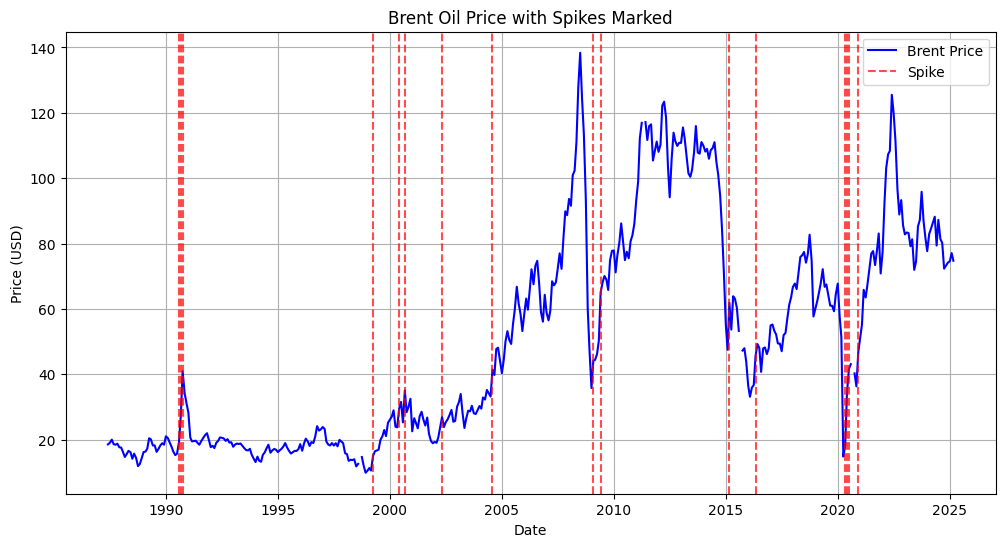

In [9]:
# Calculate the percentage change in 'price_oil_brent'
df_merged["brent_pct_change"] = df_merged["price_oil_brent"].pct_change(periods=1) * 100

# Identify the dates where the spikes occurred
spike_dates = df_merged[df_merged["brent_pct_change"] > spike]["date"]

# Plot the Brent price
plt.figure(figsize=(12, 6))
plt.plot(df_merged["date"], df_merged["price_oil_brent"], label="Brent Price", color="blue")

# Add vertical lines for spikes
for spike_date in spike_dates:
    plt.axvline(x=spike_date, color="red", linestyle="--", alpha=0.7, label="Spike")

# Add labels and legend
plt.title("Brent Oil Price with Spikes Marked")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(["Brent Price", "Spike"])
plt.grid()
plt.show()

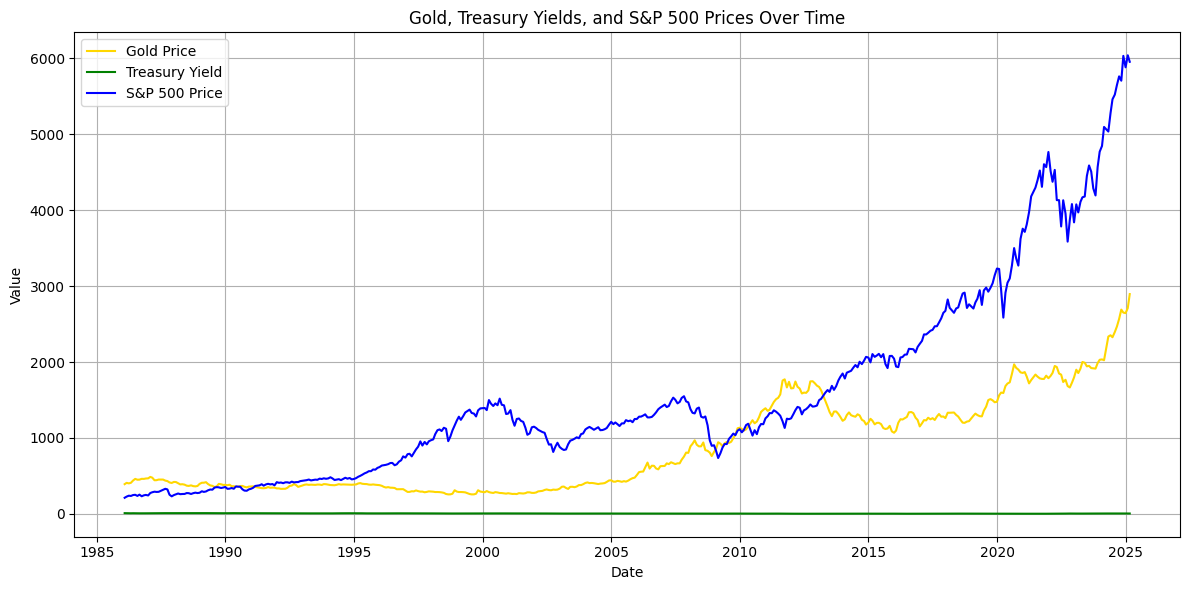

In [10]:
# Plot Gold, Treasury Yields, and S&P 500 prices for the same time period
plt.figure(figsize=(12, 6))

# Plot Gold prices
plt.plot(df_merged["date"], df_merged["price_gold"], label="Gold Price", color="gold")

# Plot Treasury Yields
plt.plot(df_merged["date"], df_merged["yield"], label="Treasury Yield", color="green")

# Plot S&P 500 prices
plt.plot(df_merged["date"], df_merged["price_sp"], label="S&P 500 Price", color="blue")

# Add labels, title, and legend
plt.title("Gold, Treasury Yields, and S&P 500 Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

##### Asset S&P500

In [11]:
# Calculate percentage changes for 1 month, 3 months, and 6 months for S&P 500
df_merged["sp_pct_change_1_month"] = df_merged["price_sp"].pct_change(periods=1) * 100
df_merged["sp_pct_change_3_months"] = df_merged["price_sp"].pct_change(periods=3) * 100
df_merged["sp_pct_change_6_months"] = df_merged["price_sp"].pct_change(periods=6) * 100

# Calculate the median percentage changes
median_sp_change_1_month = np.median(df_merged["sp_pct_change_1_month"].dropna())
median_sp_change_3_months = np.median(df_merged["sp_pct_change_3_months"].dropna())
median_sp_change_6_months = np.median(df_merged["sp_pct_change_6_months"].dropna())

# Display the results
print(f"Median S&P 500 price change over 1 month: {median_sp_change_1_month:.2f}%")
print(f"Median S&P 500 price change over 3 months: {median_sp_change_3_months:.2f}%")
print(f"Median S&P 500 price change over 6 months: {median_sp_change_6_months:.2f}%")

Median S&P 500 price change over 1 month: 1.23%
Median S&P 500 price change over 3 months: 3.25%
Median S&P 500 price change over 6 months: 5.22%


In [12]:
# Initialize lists to store percentage changes
sp_changes_1_month = []
sp_changes_3_months = []
sp_changes_6_months = []

# Loop through each spike date
for spike_date in spike_dates:
    # Filter data for 1 month, 3 months, and 6 months after the spike
    one_month_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=1))]
    three_months_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=3))]
    six_months_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=6))]
    
    # Calculate percentage change in S&P 500 price
    if not one_month_after.empty:
        change_1_month = ((one_month_after["price_sp"].iloc[-1] - df_merged[df_merged["date"] == spike_date]["price_sp"].values[0]) /
                          df_merged[df_merged["date"] == spike_date]["price_sp"].values[0]) * 100
        sp_changes_1_month.append(change_1_month)
    
    if not three_months_after.empty:
        change_3_months = ((three_months_after["price_sp"].iloc[-1] - df_merged[df_merged["date"] == spike_date]["price_sp"].values[0]) /
                           df_merged[df_merged["date"] == spike_date]["price_sp"].values[0]) * 100
        sp_changes_3_months.append(change_3_months)
    
    if not six_months_after.empty:
        change_6_months = ((six_months_after["price_sp"].iloc[-1] - df_merged[df_merged["date"] == spike_date]["price_sp"].values[0]) /
                           df_merged[df_merged["date"] == spike_date]["price_sp"].values[0]) * 100
        sp_changes_6_months.append(change_6_months)

# Calculate the median percentage changes
median_sp_change_1_month = np.median(sp_changes_1_month)
median_sp_change_3_months = np.median(sp_changes_3_months)
median_sp_change_6_months = np.median(sp_changes_6_months)

# Display the results
print(f"Median S&P 500 price change 1 month after spikes: {median_sp_change_1_month:.2f}%")
print(f"Median S&P 500 price change 3 months after spikes: {median_sp_change_3_months:.2f}%")
print(f"Median S&P 500 price change 6 months after spikes: {median_sp_change_6_months:.2f}%")

Median S&P 500 price change 1 month after spikes: -5.12%
Median S&P 500 price change 3 months after spikes: 5.26%
Median S&P 500 price change 6 months after spikes: 8.71%


##### Asset Treasury

In [13]:
# Calculate percentage changes for 1 month, 3 months, and 6 months for treasury yields
df_merged["treasury_pct_change_1_month"] = df_merged["yield"].pct_change(periods=1) * 100
df_merged["treasury_pct_change_3_months"] = df_merged["yield"].pct_change(periods=3) * 100
df_merged["treasury_pct_change_6_months"] = df_merged["yield"].pct_change(periods=6) * 100

# Calculate absolute changes for 1 month, 3 months, and 6 months for treasury yields
df_merged["treasury_abs_change_1_month"] = df_merged["yield"].diff(periods=1)
df_merged["treasury_abs_change_3_months"] = df_merged["yield"].diff(periods=3)
df_merged["treasury_abs_change_6_months"] = df_merged["yield"].diff(periods=6)

# Calculate the median percentage changes
median_treasury_change_1_month = np.median(df_merged["treasury_pct_change_1_month"].dropna())
median_treasury_change_3_months = np.median(df_merged["treasury_pct_change_3_months"].dropna())
median_treasury_change_6_months = np.median(df_merged["treasury_pct_change_6_months"].dropna())

# Calculate the median absolute changes
median_treasury_abs_change_1_month = np.median(df_merged["treasury_abs_change_1_month"].dropna())
median_treasury_abs_change_3_months = np.median(df_merged["treasury_abs_change_3_months"].dropna())
median_treasury_abs_change_6_months = np.median(df_merged["treasury_abs_change_6_months"].dropna())

# Display the results
print(f"Median treasury yield percentage change over 1 month: {median_treasury_change_1_month:.2f}%")
print(f"Median treasury yield absolute change over 1 month: {median_treasury_abs_change_1_month:.2f}")

print(f"Median treasury yield percentage change over 3 months: {median_treasury_change_3_months:.2f}%")
print(f"Median treasury yield absolute change over 3 months: {median_treasury_abs_change_3_months:.2f}")

print(f"Median treasury yield percentage change over 6 months: {median_treasury_change_6_months:.2f}%")
print(f"Median treasury yield absolute change over 6 months: {median_treasury_abs_change_6_months:.2f}")

Median treasury yield percentage change over 1 month: 0.05%
Median treasury yield absolute change over 1 month: 0.00
Median treasury yield percentage change over 3 months: 0.06%
Median treasury yield absolute change over 3 months: 0.00
Median treasury yield percentage change over 6 months: -1.12%
Median treasury yield absolute change over 6 months: -0.05


In [14]:
# Initialize lists to store percentage and absolute changes
treasury_changes_1_month = []
treasury_changes_3_months = []
treasury_changes_6_months = []

treasury_absolute_changes_1_month = []
treasury_absolute_changes_3_months = []
treasury_absolute_changes_6_months = []

# Loop through each spike date
for spike_date in spike_dates:
    # Filter data for 1 month, 3 months, and 6 months after the spike
    one_month_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=1))]
    three_months_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=3))]
    six_months_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=6))]
    
    # Calculate percentage and absolute changes in treasury yield
    if not one_month_after.empty:
        initial_yield = df_merged[df_merged["date"] == spike_date]["yield"].values[0]
        final_yield_1_month = one_month_after["yield"].iloc[-1]
        change_1_month = ((final_yield_1_month - initial_yield) / initial_yield) * 100
        absolute_change_1_month = final_yield_1_month - initial_yield
        treasury_changes_1_month.append(change_1_month)
        treasury_absolute_changes_1_month.append(absolute_change_1_month)
    
    if not three_months_after.empty:
        final_yield_3_months = three_months_after["yield"].iloc[-1]
        change_3_months = ((final_yield_3_months - initial_yield) / initial_yield) * 100
        absolute_change_3_months = final_yield_3_months - initial_yield
        treasury_changes_3_months.append(change_3_months)
        treasury_absolute_changes_3_months.append(absolute_change_3_months)
    
    if not six_months_after.empty:
        final_yield_6_months = six_months_after["yield"].iloc[-1]
        change_6_months = ((final_yield_6_months - initial_yield) / initial_yield) * 100
        absolute_change_6_months = final_yield_6_months - initial_yield
        treasury_changes_6_months.append(change_6_months)
        treasury_absolute_changes_6_months.append(absolute_change_6_months)

# Calculate the median percentage and absolute changes
median_treasury_change_1_month = np.median(treasury_changes_1_month)
median_treasury_absolute_change_1_month = np.median(treasury_absolute_changes_1_month)

median_treasury_change_3_months = np.median(treasury_changes_3_months)
median_treasury_absolute_change_3_months = np.median(treasury_absolute_changes_3_months)

median_treasury_change_6_months = np.median(treasury_changes_6_months)
median_treasury_absolute_change_6_months = np.median(treasury_absolute_changes_6_months)

# Display the results
print(f"Median treasury yield percentage change 1 month after spikes: {median_treasury_change_1_month:.2f}%")
print(f"Median treasury yield absolute change 1 month after spikes: {median_treasury_absolute_change_1_month:.2f}")

print(f"Median treasury yield percentage change 3 months after spikes: {median_treasury_change_3_months:.2f}%")
print(f"Median treasury yield absolute change 3 months after spikes: {median_treasury_absolute_change_3_months:.2f}")

print(f"Median treasury yield percentage change 6 months after spikes: {median_treasury_change_6_months:.2f}%")
print(f"Median treasury yield absolute change 6 months after spikes: {median_treasury_absolute_change_6_months:.2f}")

Median treasury yield percentage change 1 month after spikes: 2.02%
Median treasury yield absolute change 1 month after spikes: 0.08
Median treasury yield percentage change 3 months after spikes: -5.60%
Median treasury yield absolute change 3 months after spikes: -0.18
Median treasury yield percentage change 6 months after spikes: -6.60%
Median treasury yield absolute change 6 months after spikes: -0.50


##### Asset Gold

In [33]:
# Calculate percentage changes for 1 month, 3 months, and 6 months
df_merged["gold_pct_change_1_month"] = df_merged["price_gold"].pct_change(periods=1) * 100
df_merged["gold_pct_change_3_months"] = df_merged["price_gold"].pct_change(periods=3) * 100
df_merged["gold_pct_change_6_months"] = df_merged["price_gold"].pct_change(periods=6) * 100

# Calculate the median percentage changes
median_gold_change_1_month = np.median(df_merged["gold_pct_change_1_month"].dropna())
median_gold_change_3_months = np.median(df_merged["gold_pct_change_3_months"].dropna())
median_gold_change_6_months = np.median(df_merged["gold_pct_change_6_months"].dropna())

# Display the results
print(f"Median gold price change over 1 month: {median_gold_change_1_month:.2f}%")
print(f"Median gold price change over 3 months: {median_gold_change_3_months:.2f}%")
print(f"Median gold price change over 6 months: {median_gold_change_6_months:.2f}%")

Median gold price change over 1 month: 0.06%
Median gold price change over 3 months: 0.73%
Median gold price change over 6 months: 1.73%


In [16]:
# Initialize lists to store percentage changes
gold_changes_1_month = []
gold_changes_3_months = []
gold_changes_6_months = []

# Loop through each spike date
for spike_date in spike_dates:
    # Filter data for 1 month, 3 months, and 6 months after the spike
    one_month_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=1))]
    three_months_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=3))]
    six_months_after = df_merged[(df_merged["date"] > spike_date) & (df_merged["date"] <= spike_date + pd.DateOffset(months=6))]
    
    # Calculate percentage change in gold price
    if not one_month_after.empty:
        change_1_month = ((one_month_after["price_gold"].iloc[-1] - df_merged[df_merged["date"] == spike_date]["price_gold"].values[0]) /
                          df_merged[df_merged["date"] == spike_date]["price_gold"].values[0]) * 100
        gold_changes_1_month.append(change_1_month)
    
    if not three_months_after.empty:
        change_3_months = ((three_months_after["price_gold"].iloc[-1] - df_merged[df_merged["date"] == spike_date]["price_gold"].values[0]) /
                           df_merged[df_merged["date"] == spike_date]["price_gold"].values[0]) * 100
        gold_changes_3_months.append(change_3_months)
    
    if not six_months_after.empty:
        change_6_months = ((six_months_after["price_gold"].iloc[-1] - df_merged[df_merged["date"] == spike_date]["price_gold"].values[0]) /
                           df_merged[df_merged["date"] == spike_date]["price_gold"].values[0]) * 100
        gold_changes_6_months.append(change_6_months)

# Calculate the median percentage changes
median_change_1_month = np.median(gold_changes_1_month)
median_change_3_months = np.median(gold_changes_3_months)
median_change_6_months = np.median(gold_changes_6_months)

# Display the results
print(f"Median gold price change 1 month after spikes: {median_change_1_month:.2f}%")
print(f"Median gold price change 3 months after spikes: {median_change_3_months:.2f}%")
print(f"Median gold price change 6 months after spikes: {median_change_6_months:.2f}%")

Median gold price change 1 month after spikes: 0.26%
Median gold price change 3 months after spikes: 0.64%
Median gold price change 6 months after spikes: 2.46%


##### Median Changes Across Time Periods

In [17]:
# Add a column for the decade
df_merged["decade"] = (df_merged["date"].dt.year // 10) * 10

# Initialize dictionaries to store results
gold_changes_by_decade = {}
sp_changes_by_decade = {}
treasury_changes_by_decade = {}

# Loop through each decade
for decade in df_merged["decade"].unique():
    # Filter data for the current decade
    decade_data = df_merged[df_merged["decade"] == decade]
    
    # Filter spike-related data for the current decade
    decade_spikes = spike_dates[spike_dates.dt.year // 10 == decade // 10]
    
    # Initialize lists for percentage changes
    gold_changes = []
    sp_changes = []
    treasury_changes = []
    
    # Loop through each spike in the current decade
    for spike_date in decade_spikes:
        # Filter data for 1 month after the spike
        one_month_after = decade_data[(decade_data["date"] > spike_date) & (decade_data["date"] <= spike_date + pd.DateOffset(months=1))]
        
        # Calculate percentage changes
        if not one_month_after.empty:
            gold_change = ((one_month_after["price_gold"].iloc[-1] - decade_data[decade_data["date"] == spike_date]["price_gold"].values[0]) /
                           decade_data[decade_data["date"] == spike_date]["price_gold"].values[0]) * 100
            sp_change = ((one_month_after["price_sp"].iloc[-1] - decade_data[decade_data["date"] == spike_date]["price_sp"].values[0]) /
                         decade_data[decade_data["date"] == spike_date]["price_sp"].values[0]) * 100
            treasury_change = ((one_month_after["yield"].iloc[-1] - decade_data[decade_data["date"] == spike_date]["yield"].values[0]) /
                               decade_data[decade_data["date"] == spike_date]["yield"].values[0]) * 100
            
            gold_changes.append(gold_change)
            sp_changes.append(sp_change)
            treasury_changes.append(treasury_change)
    
    # Store median changes for the current decade
    gold_changes_by_decade[decade] = np.median(gold_changes) if gold_changes else None
    sp_changes_by_decade[decade] = np.median(sp_changes) if sp_changes else None
    treasury_changes_by_decade[decade] = np.median(treasury_changes) if treasury_changes else None

# Display results
print("Gold Changes by Decade:", gold_changes_by_decade)
print("S&P 500 Changes by Decade:", sp_changes_by_decade)
print("Treasury Yield Changes by Decade:", treasury_changes_by_decade)

Gold Changes by Decade: {np.int32(1980): None, np.int32(1990): np.float64(-1.1679955238494808), np.int32(2000): np.float64(3.830081034921334), np.int32(2010): None, np.int32(2020): np.float64(1.9876049508892255)}
S&P 500 Changes by Decade: {np.int32(1980): None, np.int32(1990): np.float64(-5.118430645643194), np.int32(2000): np.float64(-5.348297471976424), np.int32(2010): None, np.int32(2020): np.float64(4.528181966555827)}
Treasury Yield Changes by Decade: {np.int32(1980): None, np.int32(1990): np.float64(2.022128958412817), np.int32(2000): np.float64(1.344978165938864), np.int32(2010): None, np.int32(2020): np.float64(2.080400437979036)}


**Gold Changes:**

1990s: Median change is -1.17%, indicating a slight decline in gold prices after oil spikes during this decade.
2000s: Median change is +3.83%, showing a positive response in gold prices after oil spikes.
2010s: No data available.
2020s: Median change is +1.99%, indicating a smaller positive response compared to the 2000s.

_Trend: Gold's response to oil spikes appears to have weakened over time, with smaller positive changes in the 2020s compared to the 2000s._

**S&P 500 Changes:**

1990s: Median change is -5.12%, indicating a significant decline in S&P 500 prices after oil spikes during this decade.
2000s: Median change is -5.35%, showing a similar negative response as the 1990s.
2010s: No data available.
2020s: Median change is +4.53%, indicating a reversal to a positive response in the most recent decade.

_Trend: The influence of oil spikes on the S&P 500 has shifted from negative in the 1990s and 2000s to positive in the 2020s, suggesting a reduced negative impact or even a positive correlation in recent years._

**Treasury Yield Changes:**

1990s: Median change is +2.02%, indicating a moderate positive response in treasury yields after oil spikes.
2000s: Median change is +1.34%, showing a slightly weaker positive response compared to the 1990s.
2010s: No data available.
2020s: Median change is +2.08%, indicating a return to a stronger positive response.

_Trend: Treasury yields have consistently shown a positive response to oil spikes, with the magnitude fluctuating slightly but remaining positive over time._

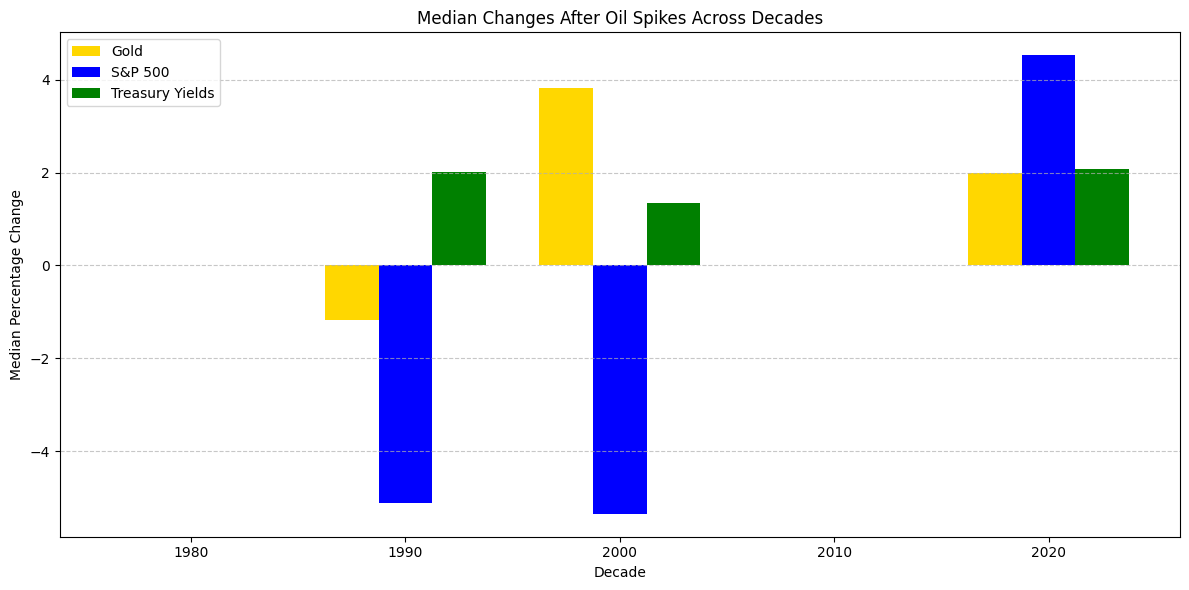

In [18]:
# Prepare data for plotting
decades = list(gold_changes_by_decade.keys())
gold_changes = [gold_changes_by_decade[decade] if gold_changes_by_decade[decade] is not None else 0 for decade in decades]
sp_changes = [sp_changes_by_decade[decade] if sp_changes_by_decade[decade] is not None else 0 for decade in decades]
treasury_changes = [treasury_changes_by_decade[decade] if treasury_changes_by_decade[decade] is not None else 0 for decade in decades]

# Set up the bar chart
x = np.arange(len(decades))  # Positions for bars
width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width, gold_changes, width, label="Gold", color="gold")
plt.bar(x, sp_changes, width, label="S&P 500", color="blue")
plt.bar(x + width, treasury_changes, width, label="Treasury Yields", color="green")

# Add labels, title, and legend
plt.xlabel("Decade")
plt.ylabel("Median Percentage Change")
plt.title("Median Changes After Oil Spikes Across Decades")
plt.xticks(x, [str(decade) for decade in decades])  # Set decade labels
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

##### Correlation Analysis


In [35]:
# Calculate correlation between oil spikes and gold, S&P 500, and treasury yields for each decade
correlations = {}

for decade in df_merged["decade"].unique():
    # Filter data for the current decade
    decade_data = df_merged[df_merged["decade"] == decade]
    
    # Calculate correlations
    correlation_gold = decade_data["brent_pct_change"].corr(decade_data["gold_pct_change_1_month"])
    correlation_sp = decade_data["brent_pct_change"].corr(decade_data["sp_pct_change_1_month"])
    correlation_treasury = decade_data["brent_pct_change"].corr(decade_data["treasury_pct_change_1_month"])
    
    correlations[decade] = {
        "gold": correlation_gold,
        "sp": correlation_sp,
        "treasury": correlation_treasury
    }

# Display correlation results
print("Correlations by Decade:", correlations)

Correlations by Decade: {np.int32(1980): {'gold': np.float64(0.500837680451389), 'sp': np.float64(-0.17510678937910956), 'treasury': np.float64(0.38841929995334473)}, np.int32(1990): {'gold': np.float64(-0.17822658155383797), 'sp': np.float64(-0.21200959489289492), 'treasury': np.float64(-0.0003355843056719238)}, np.int32(2000): {'gold': np.float64(0.1328246266151336), 'sp': np.float64(0.11308770841946303), 'treasury': np.float64(0.2262351568987084)}, np.int32(2010): {'gold': np.float64(0.04167044396553059), 'sp': np.float64(0.32699193501761686), 'treasury': np.float64(0.3781342449282521)}, np.int32(2020): {'gold': np.float64(0.00814440483570029), 'sp': np.float64(0.3810118627040384), 'treasury': np.float64(0.2900202602977315)}}


**Gold:**

1980s: Moderate positive correlation (+0.50), suggesting oil spikes had a noticeable influence on gold prices.
1990s: Weak negative correlation (-0.18), indicating a reduced or inverse relationship.
2000s: Weak positive correlation (+0.13), showing a slight influence of oil spikes on gold prices.
2010s: Very weak positive correlation (+0.04), suggesting almost no relationship.
2020s: Very weak positive correlation (+0.01), indicating oil spikes have minimal influence on gold prices in recent years.

_Trend: The correlation between oil spikes and gold prices has weakened significantly over time, suggesting that gold is less influenced by oil spikes in recent decades._

**S&P 500:**

1980s: Weak negative correlation (-0.18), indicating a slight inverse relationship.
1990s: Weak negative correlation (-0.21), showing a stronger inverse relationship.
2000s: Weak positive correlation (+0.11), suggesting a shift toward a positive relationship.
2010s: Moderate positive correlation (+0.33), indicating oil spikes had a noticeable positive influence on S&P 500 prices.
2020s: Moderate positive correlation (+0.38), showing a continued positive relationship.

_Trend: The correlation between oil spikes and S&P 500 prices has shifted from negative in earlier decades to positive in recent decades, suggesting that oil spikes may now be perceived as less disruptive to equity markets._

**Treasury Yields:**

1980s: Moderate positive correlation (+0.39), indicating oil spikes had a noticeable influence on treasury yields.
1990s: Very weak negative correlation (-0.00), suggesting almost no relationship.
2000s: Weak positive correlation (+0.23), showing a slight influence of oil spikes on treasury yields.
2010s: Moderate positive correlation (+0.38), indicating oil spikes had a noticeable influence on treasury yields.
2020s: Moderate positive correlation (+0.29), showing a continued positive relationship.

_Trend: Treasury yields have consistently shown a positive correlation with oil spikes, though the strength of the relationship has fluctuated slightly over time._

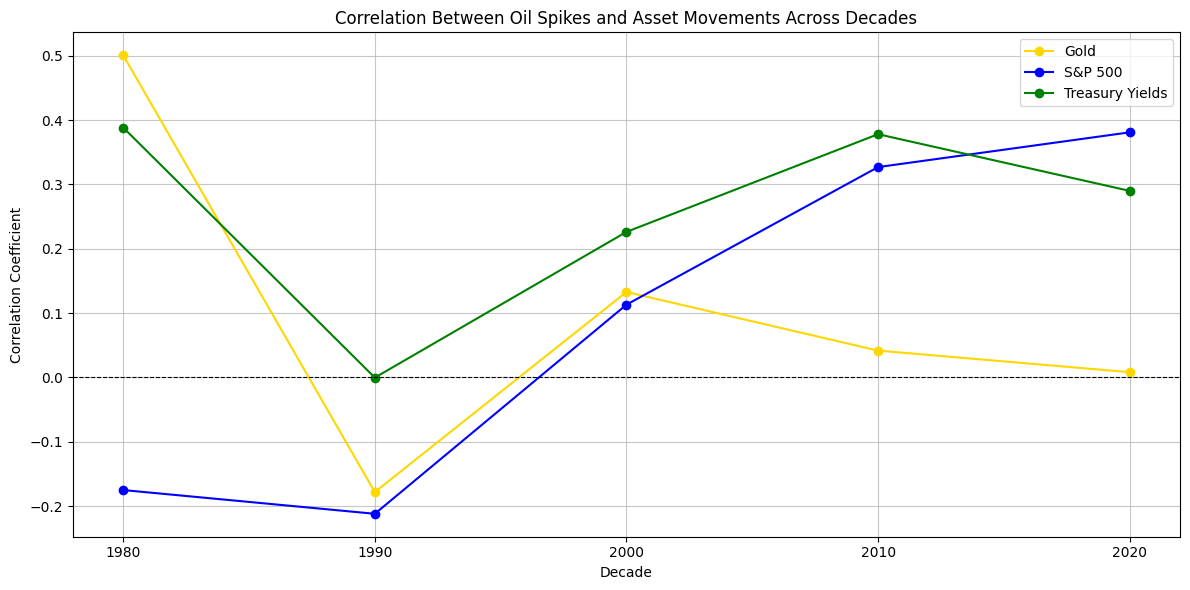

In [20]:
# Prepare data for plotting
decades = list(correlations.keys())
gold_corr = [correlations[decade]["gold"] for decade in decades]
sp_corr = [correlations[decade]["sp"] for decade in decades]
treasury_corr = [correlations[decade]["treasury"] for decade in decades]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(decades, gold_corr, marker="o", label="Gold", color="gold")
plt.plot(decades, sp_corr, marker="o", label="S&P 500", color="blue")
plt.plot(decades, treasury_corr, marker="o", label="Treasury Yields", color="green")

# Add labels, title, and legend
plt.xlabel("Decade")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Between Oil Spikes and Asset Movements Across Decades")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Add a horizontal line at 0 for reference
plt.xticks(decades, [str(decade) for decade in decades])  # Set decade labels
plt.legend()
plt.grid(alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion Consequences

**Gold:** The influence of oil spikes on gold prices has weakened significantly over time, with both median changes and correlations decreasing in recent decades.

**S&P 500:** The influence of oil spikes on the S&P 500 has shifted from negative to positive, suggesting a reduced disruptive impact on equity markets in recent years.

**Treasury Yields:** Treasury yields have consistently shown a positive response to oil spikes, with the magnitude of the influence remaining relatively stable.


## Analyse Likelyhood

In [ ]:
data = [
    {
        "conflict": "Iran–Iraq War",
        "start": "1980-09-22",
        "end": "1988-08-20",
        "parties": "Iran, Iraq"
    },
    {
        "conflict": "1980 Turkish Coup d'État",
        "start": "1980-09-12",
        "end": "1980-09-12",
        "parties": "Turkey (military, government)"
    },
    {
        "conflict": "Israeli Airstrike on Osirak Reactor",
        "start": "1981-06-07",
        "end": "1981-06-07",
        "parties": "Israel, Iraq"
    },
    {
        "conflict": "Israeli Invasion of Lebanon",
        "start": "1982-06-06",
        "end": "1982-09-01",
        "parties": "Israel, Lebanon, PLO"
    },
    {
        "conflict": "South Yemen Civil War",
        "start": "1986-01-13",
        "end": "1986-01-24",
        "parties": "South Yemen factions"
    },
    {
        "conflict": "First Intifada",
        "start": "1987-12-09",
        "end": "1993-09-13",
        "parties": "Palestinians, Israel"
    },
    {
        "conflict": "Gulf War (Iraq–Kuwait/Coalition)",
        "start": "1990-08-02",
        "end": "1991-02-28",
        "parties": "Iraq, Kuwait, US-led coalition"
    },
    {
        "conflict": "Yemeni Civil War (Unification)",
        "start": "1994-05-04",
        "end": "1994-07-07",
        "parties": "North Yemen, South Yemen"
    },
    {
        "conflict": "Second Intifada",
        "start": "2000-09-28",
        "end": "2005-02-08",
        "parties": "Palestinians, Israel"
    },
    {
        "conflict": "U.S. Invasion of Afghanistan",
        "start": "2001-10-  07",
        "end": "2021-08-30",
        "parties": "US, Taliban, NATO, Afghan gov."
    },
    {
        "conflict": "U.S. Invasion of Iraq",
        "start": "2003-03-20",
        "end": "2011-12-18",
        "parties": "US, Iraq, Coalition"
    },
    {
        "conflict": "2006 Lebanon War",
        "start": "2006-07-12",
        "end": "2006-08-14",
        "parties": "Israel, Hezbollah"
    },
    {
        "conflict": "Gaza War (Cast Lead)",
        "start": "2008-12-27",
        "end": "2009-01-18",
        "parties": "Israel, Hamas"
    },
    {
        "conflict": "Arab Spring (Egypt)",
        "start": "2011-01-25",
        "end": "2011-02-11",
        "parties": "Egypt (gov., protesters)"
    },
    {
        "conflict": "Syrian Civil War",
        "start": "2011-03-15",
        "end": "Ongoing",
        "parties": "Syria (gov., rebels, ISIS, others)"
    },
    {
        "conflict": "Yemeni Civil War (Houthi)",
        "start": "2014-09-21",
        "end": "Ongoing",
        "parties": "Yemen (gov., Houthis, Saudi, UAE)"
    },
    {
        "conflict": "ISIS in Iraq/Syria",
        "start": "2014-06-10",
        "end": "2017-12-09",
        "parties": "ISIS, Iraq, Syria, Coalition"
    },
    {
        "conflict": "Gaza War (Protective Edge)",
        "start": "2014-07-08",
        "end": "2014-08-26",
        "parties": "Israel, Hamas"
    },
    {
        "conflict": "Turkish Op. Euphrates Shield",
        "start": "2016-08-24",
        "end": "2017-03-29",
        "parties": "Turkey, Syrian groups, ISIS"
    },
    {
        "conflict": "Turkish Op. Olive Branch",
        "start": "2018-01-20",
        "end": "2018-03-24",
        "parties": "Turkey, Syrian Kurds"
    },
    {
        "conflict": "Turkish Op. Peace Spring",
        "start": "2019-10-09",
        "end": "2019-11-25",
        "parties": "Turkey, Syrian Kurds"
    },
    {
        "conflict": "Israel–Gaza Conflict (Guardian Walls)",
        "start": "2021-05-10",
        "end": "2021-05-21",
        "parties": "Israel, Hamas"
    },
    {
        "conflict": "Israel–Gaza War (2023)",
        "start": "2023-10-07",
        "end": "Ongoing",
        "parties": "Israel, Hamas"
    },
    {
        "conflict": "Red Sea Crisis (Houthi Attacks)",
        "start": "2023-10-19",
        "end": "Ongoing",
        "parties": "Houthis, international shipping"
    }
]

# Create DataFrame
df_conflict = pd.DataFrame(data)

df_conflict.head()


,conflict,start,end,parties
0,Iran–Iraq War,1980-09-22,1988-08-20,"Iran, Iraq"
1,1980 Turkish Coup d'État,1980-09-12,1980-09-12,"Turkey (military, government)"
2,Israeli Airstrike on Osirak Reactor,1981-06-07,1981-06-07,"Israel, Iraq"
3,Israeli Invasion of Lebanon,1982-06-06,1982-09-01,"Israel, Lebanon, PLO"
4,South Yemen Civil War,1986-01-13,1986-01-24,South Yemen factions


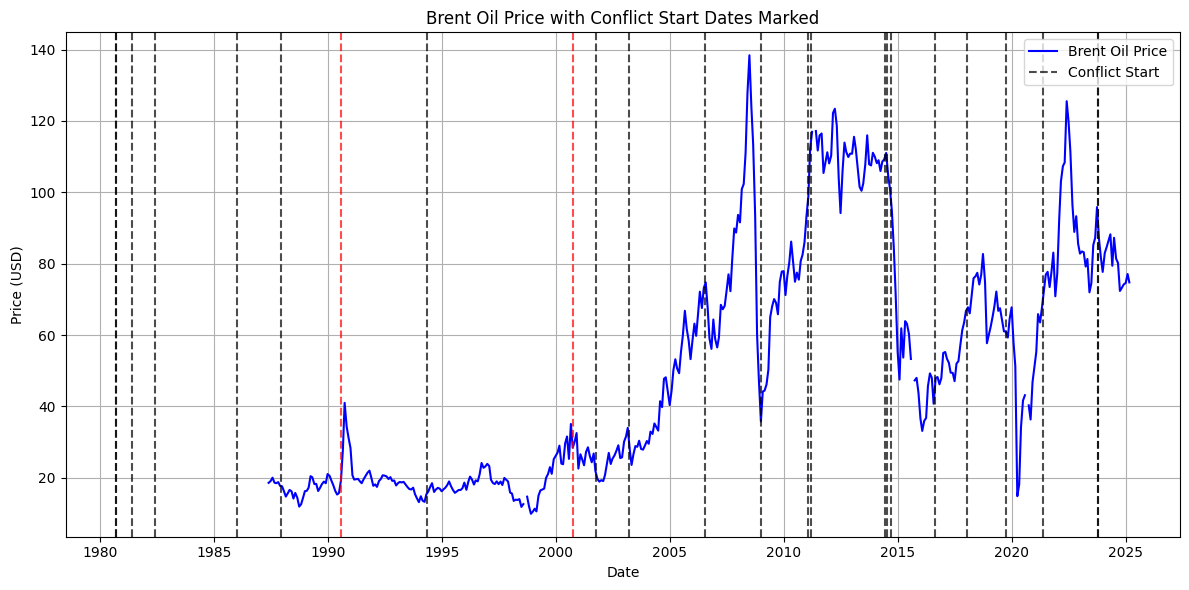

Conflicts marked red (spike occurred within 1 month):
Gulf War (Iraq–Kuwait/Coalition) (1990-08-02)
Second Intifada (2000-09-28)


In [22]:
# Ensure the 'start' column in df_conflict is in datetime format
df_conflict["start"] = pd.to_datetime(df_conflict["start"], errors="coerce")

# Initialize a list to store conflicts marked red
red_conflicts = []

# Plot the Brent oil price
plt.figure(figsize=(12, 6))
plt.plot(df_merged["date"], df_merged["price_oil_brent"], label="Brent Oil Price", color="blue")

# Add vertical lines for conflict start dates
for _, row in df_conflict.iterrows():
    if pd.notnull(row["start"]):  # Ensure valid start date
        # Check if a spike occurred within 1 month before or after the conflict start
        spike_occurred = any((spike_date >= row["start"] - pd.DateOffset(months=1)) & (spike_date <= row["start"] + pd.DateOffset(months=1)) for spike_date in spike_dates)
        
        # Mark the line as red if a spike occurred, otherwise black
        line_color = "red" if spike_occurred else "black"
        plt.axvline(x=row["start"], color=line_color, linestyle="--", alpha=0.7)
        
        # If marked red, add the conflict name and date to the list
        if spike_occurred:
            red_conflicts.append(f"{row['conflict']} ({row['start'].date()})")

# Add labels, title, and legend
plt.title("Brent Oil Price with Conflict Start Dates Marked")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(["Brent Oil Price", "Conflict Start"])
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# Print the names and dates of conflicts marked red
print("Conflicts marked red (spike occurred within 1 month):")
for conflict in red_conflicts:
    print(conflict)

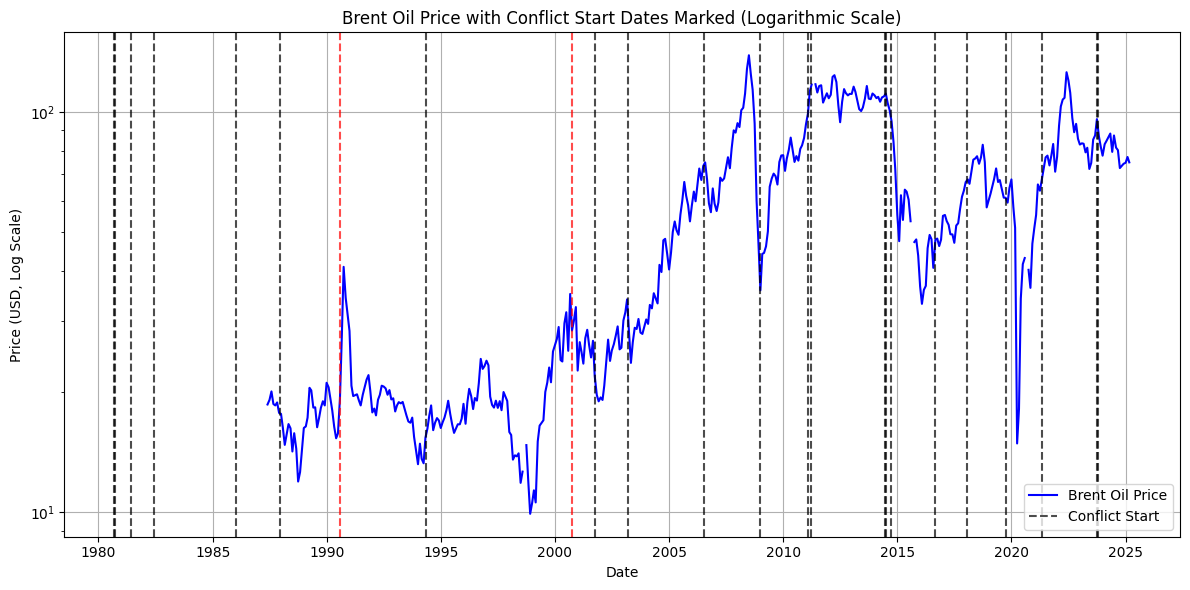

Conflicts marked red (spike occurred within 1 month):
Gulf War (Iraq–Kuwait/Coalition) (1990-08-02)
Second Intifada (2000-09-28)


In [23]:
# Ensure the 'start' column in df_conflict is in datetime format
df_conflict["start"] = pd.to_datetime(df_conflict["start"], errors="coerce")

# Initialize a list to store conflicts marked red
red_conflicts = []

# Plot the Brent oil price
plt.figure(figsize=(12, 6))
plt.plot(df_merged["date"], df_merged["price_oil_brent"], label="Brent Oil Price", color="blue")

# Set the y-axis to logarithmic scale
plt.yscale("log")

# Add vertical lines for conflict start dates
for _, row in df_conflict.iterrows():
    if pd.notnull(row["start"]):  # Ensure valid start date
        # Check if a spike occurred within 1 month before or after the conflict start
        spike_occurred = any((spike_date >= row["start"] - pd.DateOffset(months=1)) & (spike_date <= row["start"] + pd.DateOffset(months=1)) for spike_date in spike_dates)
        
        # Mark the line as red if a spike occurred, otherwise black
        line_color = "red" if spike_occurred else "black"
        plt.axvline(x=row["start"], color=line_color, linestyle="--", alpha=0.7)
        
        # If marked red, add the conflict name and date to the list
        if spike_occurred:
            red_conflicts.append(f"{row['conflict']} ({row['start'].date()})")

# Add labels, title, and legend
plt.title("Brent Oil Price with Conflict Start Dates Marked (Logarithmic Scale)")
plt.xlabel("Date")
plt.ylabel("Price (USD, Log Scale)")
plt.legend(["Brent Oil Price", "Conflict Start"])
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# Print the names and dates of conflicts marked red
print("Conflicts marked red (spike occurred within 1 month):")
for conflict in red_conflicts:
    print(conflict)

In [30]:

# Filter df_oil to start from May 20, 1987
df_filtered = df_oil[df_oil["date"] >= pd.to_datetime("1987-05-20")]

# Create the new DataFrame
df_conflict_spike = pd.DataFrame()
df_conflict_spike["date"] = df_filtered["date"]

# Initialize columns for oil prices
df_conflict_spike["oil_price"] = df_filtered["price_oil_brent"]
df_conflict_spike["oil_price_spike"] = np.nan

# Loop through each spike period and update the columns
for _, spike_row in spike_cases.iterrows():
    spike_start = spike_row["date"]
    spike_end = spike_start + pd.DateOffset(months=1)  # Define the spike period (1 month after the spike start)
    
    # Mark the spike period in "oil_price_spike"
    df_conflict_spike.loc[(df_conflict_spike["date"] >= spike_start) & (df_conflict_spike["date"] <= spike_end), "oil_price_spike"] = df_conflict_spike["oil_price"]
    
    # Remove the spike period from "oil_price"
    df_conflict_spike.loc[(df_conflict_spike["date"] >= spike_start) & (df_conflict_spike["date"] <= spike_end), "oil_price"] = np.nan

# Save the DataFrame to a CSV file
df_conflict_spike.to_csv("export/conflict_spike.csv", index=False)

# Display the first few rows of the new DataFrame
print(df_conflict_spike.head())

          date oil_price oil_price_spike
348 1987-05-20     18.63             NaN
349 1987-05-21     18.45             NaN
350 1987-05-22     18.55             NaN
351 1987-05-25      18.6             NaN
352 1987-05-26     18.63             NaN
